<a href="https://colab.research.google.com/github/Nourankh20/Data-Visualization/blob/noha/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/Nourankh20/Data-Visualization/main/datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../datasets/{dataset_name}'


In [156]:
athlete_events_df =  pd.read_csv(get_path('athlete_events.csv'))

In [157]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
noc_regions = pd.read_csv(get_path('noc_regions.csv'))

In [158]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Merging the 2 datasets into one dataset called df

In [ ]:
df = pd.merge(athlete_events_df,noc_regions,left_on='NOC',right_on='NOC')

In [159]:
df.head()

df = df.drop_duplicates()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [160]:
null_values_percentages = df.isna().sum()/len(df) *100
null_values_percentages

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453460
Height    21.800269
Weight    22.806646
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.239177
region     0.007796
notes     98.130907
dtype: float64

# Dealing with outliers in Height


Sport
Alpine Skiing                177.891374
Archery                      178.477842
Art Competitions             174.806452
Athletics                    179.772291
Badminton                    179.698435
Baseball                     182.599291
Basketball                   194.922226
Beach Volleyball             193.290909
Biathlon                     178.856281
Bobsleigh                    181.992015
Boxing                       172.891724
Canoeing                     181.212532
Cross Country Skiing         177.757682
Curling                      180.709251
Cycling                      177.743856
Diving                       171.555352
Equestrianism                176.563172
Fencing                      180.014125
Figure Skating               176.062271
Football                     177.480339
Freestyle Skiing             176.442424
Golf                         178.985915
Gymnastics                   167.644438
Handball                     188.778373
Hockey                       176.8

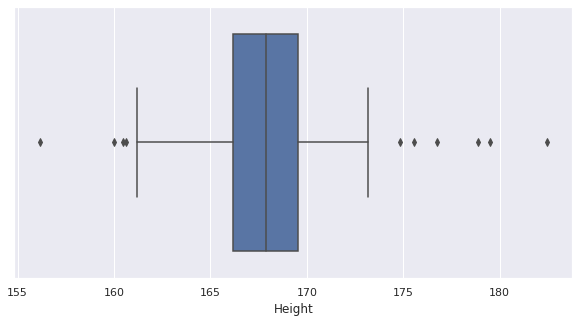

In [161]:
import seaborn as sns

Females= df[df['Sex']=='F']
Males=df[df['Sex']=='M']


sports_height_females = Females.groupby(Females['Sport'])['Height'].mean()
sports_height_males = Males.groupby(Males['Sport'])['Height'].mean()


dropped_null_values_height_females = sports_height_females.dropna(how='all')
dropped_null_values_height_females.values

dropped_null_values_height_males = sports_height_males.dropna(how='all')
dropped_null_values_height_males
print(dropped_null_values_height_males)

ay = sns.boxplot(x=dropped_null_values_height_females)


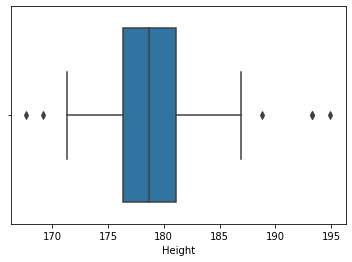

In [ ]:
ay = sns.boxplot(x=dropped_null_values_height_males)


In [ ]:
#Removed outliers in female height

Q1 = np.percentile(dropped_null_values_height_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1


Females = Females[~(Females['Height'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Height'] <= (Q1-1.5*IQR))]




#Removed outliers in male height

Q1 = np.percentile(dropped_null_values_height_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Height'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Height'] <= (Q1-1.5*IQR))]




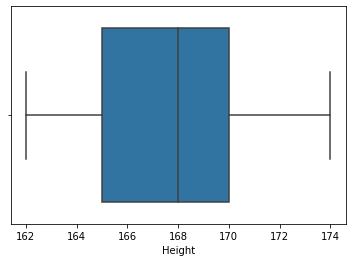

In [ ]:
ax = sns.boxplot(x=Females['Height'])


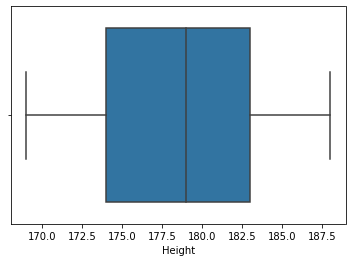

In [ ]:
ax = sns.boxplot(x=Males['Height'])


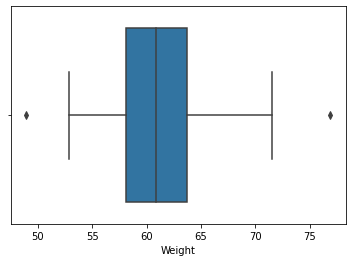

In [ ]:

sports_weight_females = Females.groupby(Females['Sport'])['Weight'].mean()
sports_weight_males = Males.groupby(Males['Sport'])['Weight'].mean()


dropped_null_values_weight_females = sports_weight_females.dropna(how='all')
dropped_null_values_weight_females.values

dropped_null_values_weight_males = sports_weight_males.dropna(how='all')
dropped_null_values_weight_males


ay = sns.boxplot(x=dropped_null_values_weight_females)




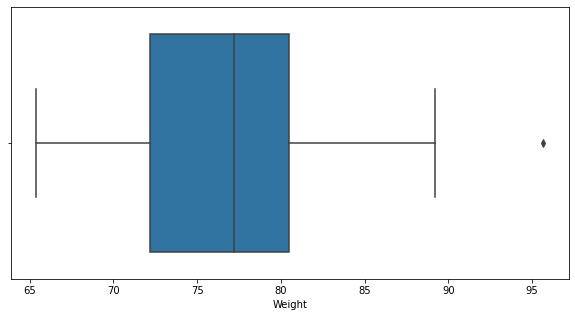

In [ ]:
ay = sns.boxplot(x=dropped_null_values_weight_males)



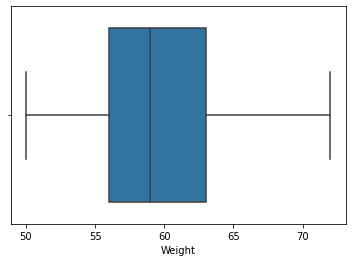

In [ ]:

#Removed outliers in female weight

Q1 = np.percentile(dropped_null_values_weight_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Females = Females[~(Females['Weight'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Weight'] <= (Q1-1.5*IQR))]


#Removed outliers in male weight

Q1 = np.percentile(dropped_null_values_weight_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Weight'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Weight'] <= (Q1-1.5*IQR))]

ay = sns.boxplot(x=Females['Weight'])



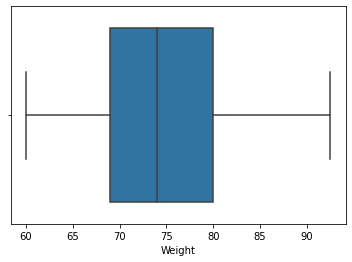

In [ ]:
ay = sns.boxplot(x=Males['Weight'])


In [ ]:
Males.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN


In [ ]:
Males['Weight']

0         80.0
1         60.0
2         75.0
6         72.0
7         72.0
          ... 
270753    65.0
270754    65.0
270758     NaN
270765    63.0
270766    75.0
Name: Weight, Length: 148253, dtype: float64

In [ ]:
#Male height nan
height = Males[(Males['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]
    if dropped_null_values_height_males.index.str.contains(sport).any() :
      Males.loc[index,['Height']] = dropped_null_values_height_males[sport]  

In [ ]:
Males.isna().sum()/len(Males)  *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        5.867672
Height     0.062056
Weight    36.492348
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.002981
region     0.006745
notes     97.829386
dtype: float64

In [ ]:
dropped_null_values_weight_males

Sport
Alpine Skiing                79.142537
Archery                      77.210767
Art Competitions             76.104167
Athletics                    72.086167
Badminton                    73.959437
Baseball                     84.131350
Basketball                   78.560583
Beach Volleyball             83.509804
Biathlon                     72.619969
Bobsleigh                    89.218625
Boxing                       68.805464
Canoeing                     78.885836
Cross Country Skiing         72.013646
Curling                      81.121827
Cycling                      72.574008
Diving                       69.941541
Equestrianism                71.131241
Fencing                      74.639399
Figure Skating               70.916139
Football                     73.235920
Freestyle Skiing             74.852381
Golf                         79.116279
Gymnastics                   66.786002
Handball                     82.996945
Hockey                       74.009376
Ice Hockey         

In [ ]:
#Male weight
Males = Males[Males.Sport != 'Polo']
weight = Males[(Males['Weight'].isna())]
print(Males['Weight'].isna().sum())
for index, row in weight.iterrows():
    sport = row[12]
    if dropped_null_values_weight_males.index.str.contains(sport).any() :
      print( dropped_null_values_weight_males[sport])
      Males.loc[index,['Weight']] = dropped_null_values_weight_males[sport]



54006
72.08616699305679
70.91613924050633
75.29921942758023
72.08616699305679
72.08616699305679
72.08616699305679
72.08616699305679
76.10416666666667
72.08616699305679
72.08616699305679
72.08616699305679
72.08616699305679
76.10416666666667
78.56058282208589
72.08616699305679
72.08616699305679
68.80546448087432
78.56058282208589
78.56058282208589
72.08616699305679
76.44634146341464
76.44634146341464
76.44634146341464
72.08616699305679
79.0185389133627
72.6199687377882
73.23592010478062
72.08616699305679
72.08616699305679
73.23592010478062
78.56058282208589
72.08616699305679
72.08616699305679
72.08616699305679
72.08616699305679
70.91613924050633
78.56058282208589
78.56058282208589
78.56058282208589
73.23592010478062
79.14253664373318
79.14253664373318
76.44634146341464
76.44634146341464
78.56058282208589
70.91613924050633
76.44634146341464
76.44634146341464
72.6199687377882
72.6199687377882
72.01364572605561
72.01364572605561
72.01364572605561
72.08616699305679
72.08616699305679
78.56058

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Streaming output truncated to the last 5000 lines.
73.23592010478062
72.08616699305679
73.23592010478062
74.63939920556108
82.16848673946959
73.23592010478062
75.29921942758023
83.29680444598819
72.08616699305679
72.08616699305679
72.57400786557025
72.57400786557025
75.29921942758023
72.08616699305679
72.08616699305679
73.23592010478062
83.18859138533178
83.18859138533178
72.57400786557025
72.57400786557025
73.23592010478062
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
66.78600169419738
75.29921942758023
75.29921942758023
78.885835694051
78.885835694051
73.23592010478062
68.80546448087432
66.78600169419738

In [ ]:
Males.isna().sum()/len(Males) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        5.868060
Height     0.062096
Weight     0.077620
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.039228
region     0.006750
notes     97.827994
dtype: float64

In [ ]:
#Female height
height = Females[(Females['Height'].isna())]
for index, row in height.iterrows():
    sport = row[12]
    if dropped_null_values_height_females.index.str.contains(sport).any() :
      Females.loc[index,['Height']] = dropped_null_values_height_females[sport]

Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.965201
Height     0.018926
Weight    17.595988
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.817700
region     0.004731
notes     98.679946
dtype: float64

In [ ]:
#Female weight
weight = Females[(Females['Weight'].isna())]
for index, row in weight.iterrows():
    sport = row[12]
    if dropped_null_values_weight_females.index.str.contains(sport).any() :
      Females.loc[index,['Weight']] = dropped_null_values_weight_females[sport]

Females.isna().sum()/len(Females) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        0.965201
Height     0.018926
Weight     0.908424
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.817700
region     0.004731
notes     98.679946
dtype: float64

In [ ]:
frames = [Females, Males]
Olympics_data_cleaned = pd.concat(frames)
Olympics_data_cleaned.isna().sum()/len(Olympics_data_cleaned) *100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        4.779734
Height     0.052513
Weight     0.262040
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.990054
region     0.006302
notes     98.017109
dtype: float64

In [ ]:
Olympics_data_cleaned.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,NaN,China,NaN
20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN


City and Medal


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
tmp_medal = Olympics_data_cleaned[Olympics_data_cleaned.Medal.notnull()]
tmp_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN
33,7597,Bao Yingying,F,24.0,172.0,67.0,China,CHN,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Team",Silver,China,NaN
53,17282,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,China,NaN
118,19779,Chang Si,F,25.0,170.0,56.0,China,CHN,2012 Summer,2012,Summer,London,Synchronized Swimming,Synchronized Swimming Women's Team,Silver,China,NaN
155,20198,Chen Hong,F,26.0,172.0,70.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270193,113752,"Malcolm Emanuel Augustus ""Mal"" Spence",M,24.0,177.0,71.0,West Indies Federation,WIF,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,West Indies Federation
270195,129205,"James Edward ""Jim"" Wedderburn",M,22.0,178.0,73.0,West Indies Federation,WIF,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,Trinidad,West Indies Federation
270328,86592,Vnuste Niyongabo,M,22.0,176.0,60.0,Burundi,BDI,1996 Summer,1996,Summer,Atlanta,Athletics,"Athletics Men's 5,000 metres",Gold,Burundi,NaN
270492,48966,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,Vietnam,NaN


In [ ]:
total_medals =  Olympics_data_cleaned.groupby(['Sex','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

total_medals['Total'] = total_medals['Bronze'] + total_medals['Silver'] + total_medals['Gold']

total_medals = total_medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)
total_medals

Medal,Bronze,Silver,Gold,Total
Sex,,,,
M,6984,6887,6813,20684
F,2016,2015,1964,5995


# Clustring

Weightlifting

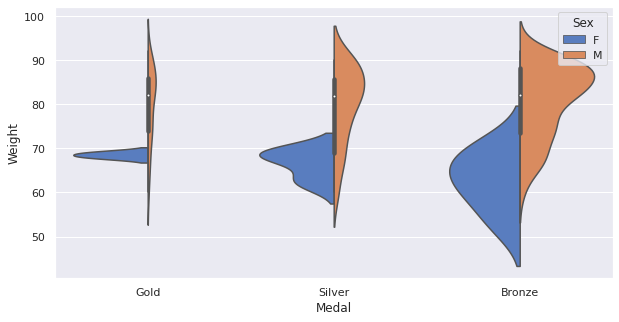

In [167]:
Weightlifting = tmp_medal.loc[tmp_medal['Sport'] == 'Weightlifting']

ax = sns.violinplot(x="Medal", y="Weight", hue="Sex", data=Weightlifting, palette="muted", split=True)

Basketball

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Heightfor Basketball athletics')

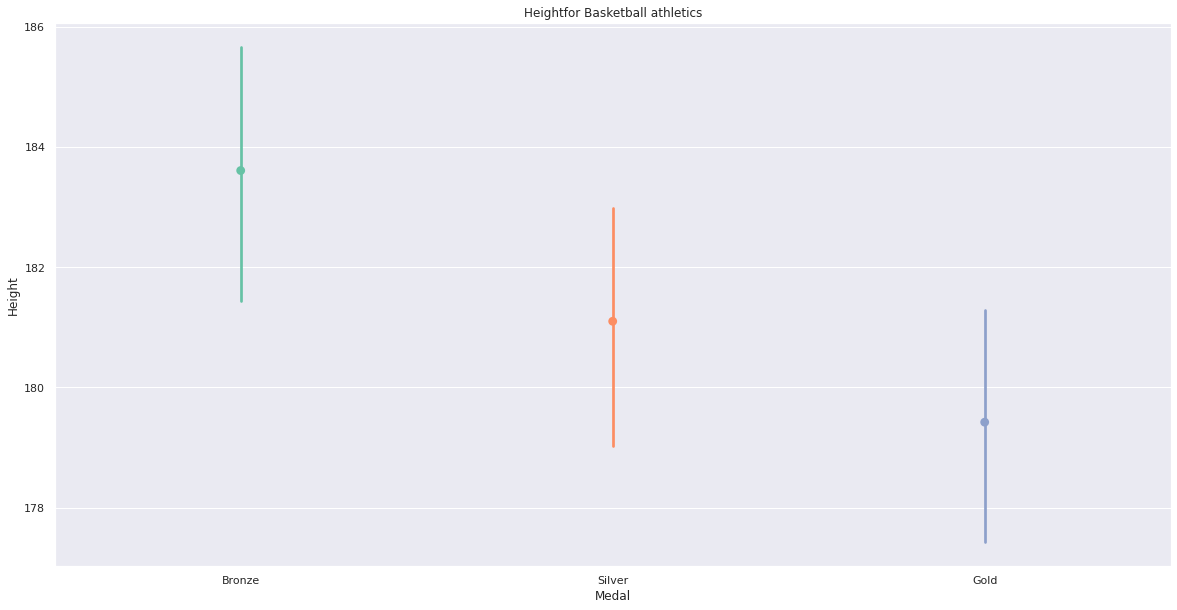

In [188]:
Basketball = tmp_medal.loc[tmp_medal['Sport'] == 'Basketball']

plt.figure(figsize=(20, 10))
sns.pointplot('Medal', 'Height', data=Basketball, palette='Set2')
plt.title('Heightfor Basketball athletics')

Swimming

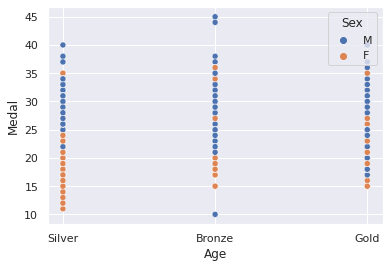

In [209]:
Gymnastics = tmp_medal.loc[tmp_medal['Sport'] == 'Gymnastics']

sns.scatterplot(x=Gymnastics.Medal, y=Gymnastics.Age, hue='Sex', data=tmp_medal)
plt.xlabel("Age")
plt.ylabel("Medal");

Data cleaning visualization after cleaning


# **Age characteristic Variation**

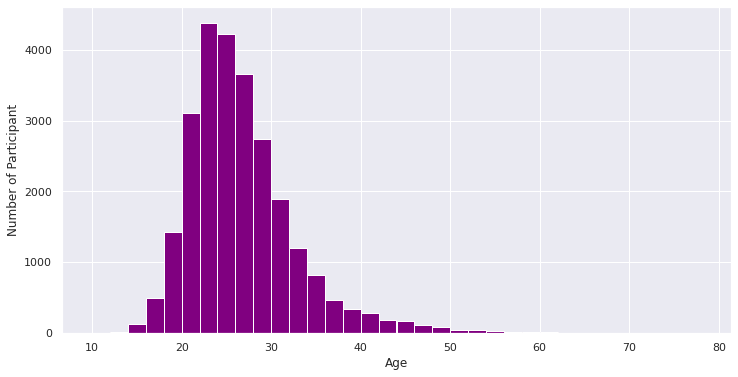

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure

plt.figure(figsize=(12, 6))
# plt.title(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(tmp_medal.Age, bins=np.arange(10,80,2), color='purple');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

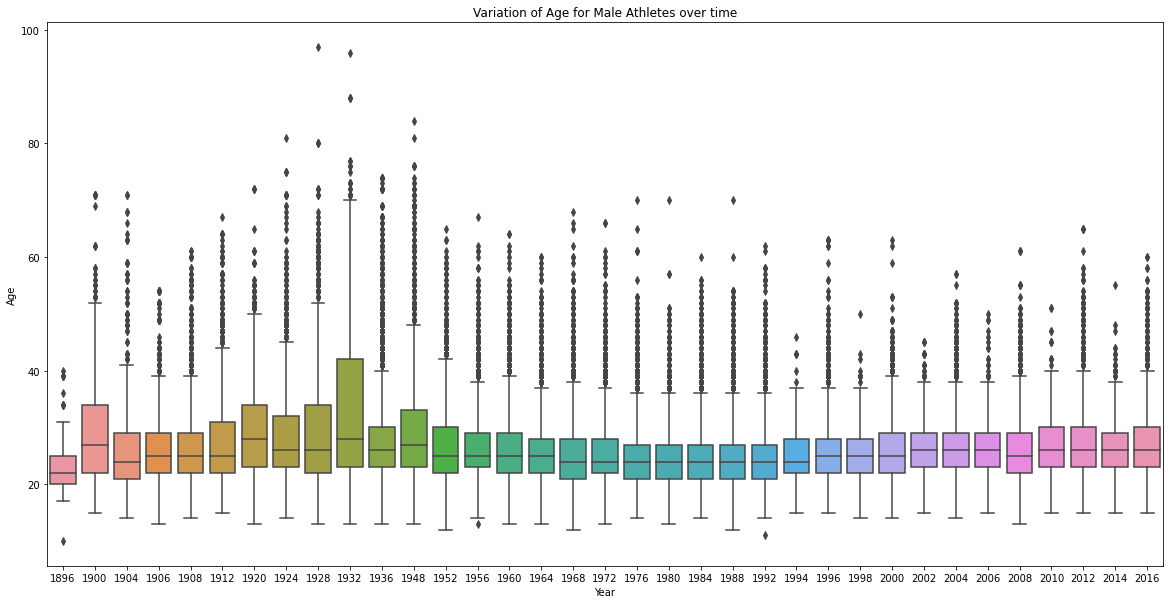

In [ ]:
#Variation of Age for Male Athletes over time
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=Males)
plt.title('Variation of Age for Males over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

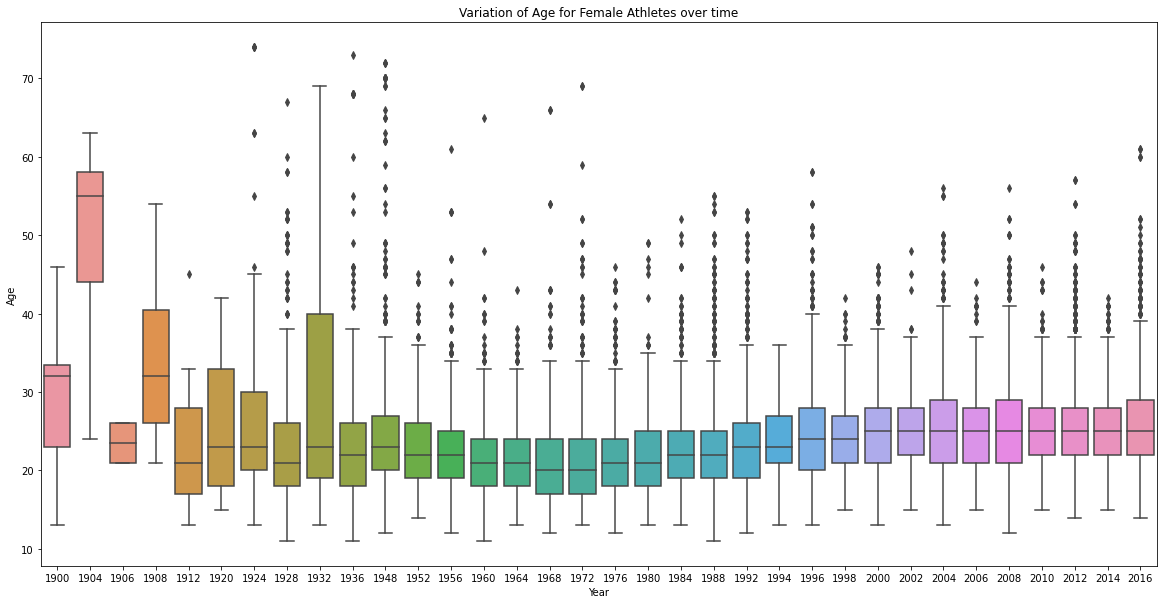

In [ ]:
#Variation of Age for Female Athletes over time
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=Females)
plt.title('Variation of Age for Female Athletes over time')

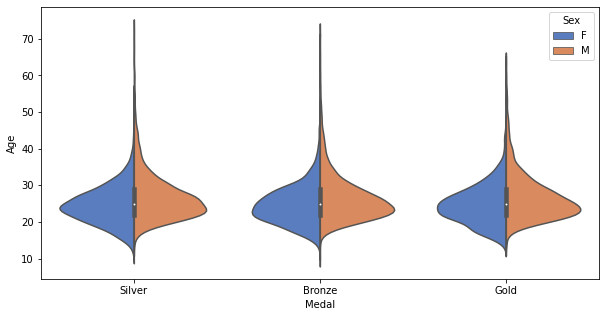

In [ ]:
var = sns.violinplot(x="Medal", y="Age", hue="Sex", data=Olympics_data_cleaned, palette="muted", split=True)

# **Height and Weight Variation**

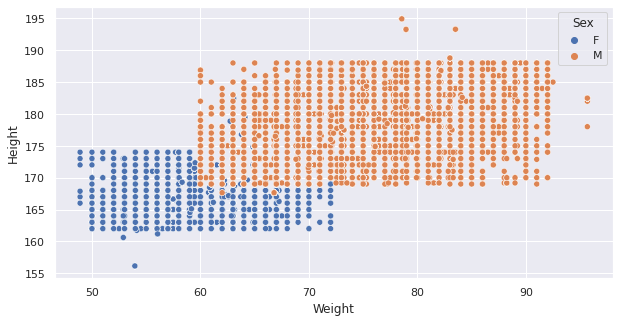

In [ ]:
sns.scatterplot(x=tmp_medal.Weight, y=tmp_medal.Height, hue='Sex', data=tmp_medal)
plt.xlabel("Weight")
plt.ylabel("Height");


# **Region characteristic Variation**


In [ ]:
medals_graphs = df.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals_graphs['Total'] = medals_graphs['Bronze'] + medals_graphs['Silver'] + medals_graphs['Gold']

medals_graphs = medals_graphs[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals_graphs.iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games [Top 15]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\
#.background_gradient(subset=['Total'], cmap='BuGn')

Medal,Bronze,Silver,Gold,Total
region,,,,
USA,1358,1641,2638,5637
Russia,1178,1170,1599,3947
Germany,1260,1195,1301,3756
UK,651,739,678,2068
France,666,610,501,1777
Italy,531,531,575,1637
Sweden,535,522,479,1536
Canada,451,438,463,1352
Australia,522,459,368,1349


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=output.Highest_Number_Of_Medals_per_Year, y=output.Team)
plt.title("");
plt.xlabel('Medals per Year');

# **Gender characteristic Variation**

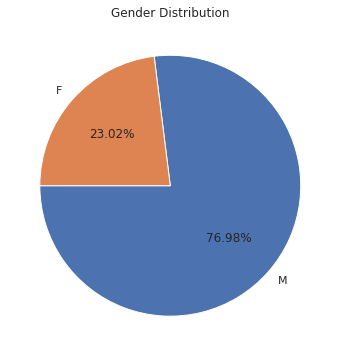

In [ ]:
gender_counts = tmp_medal.Sex.value_counts()
gender_counts

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct="%0.2f%%", startangle=180);

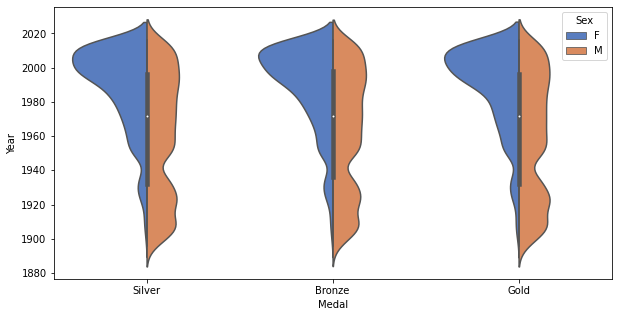

In [ ]:
var = sns.violinplot(x="Medal", y="Year", hue="Sex", data=Olympics_data_cleaned, palette="muted", split=True)

Text(0.5, 1.0, 'Variation of Female Athletes over time')

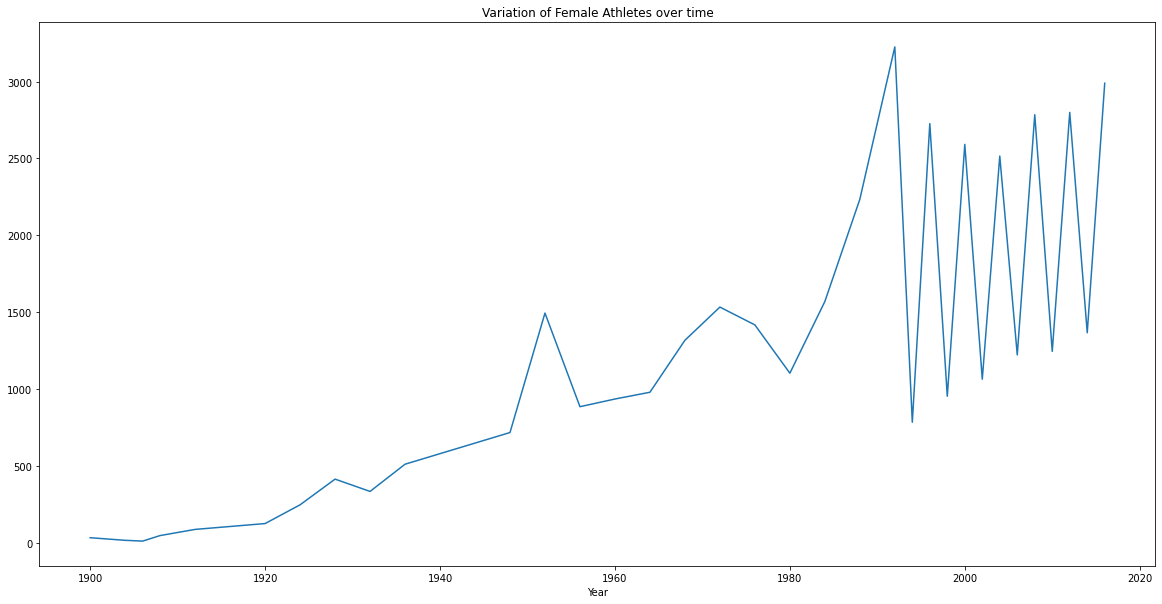

In [ ]:
#females
part = Females.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

Text(0.5, 1.0, 'Variation of Male Athletes over time')

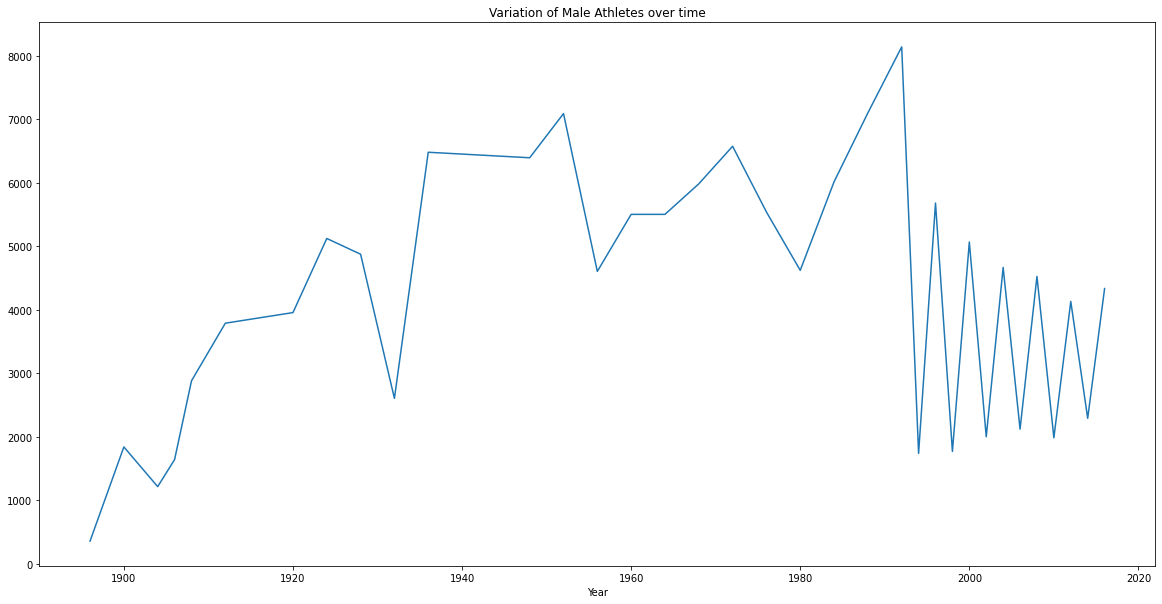

In [ ]:
#males
part = Males.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Sports for Males over time')

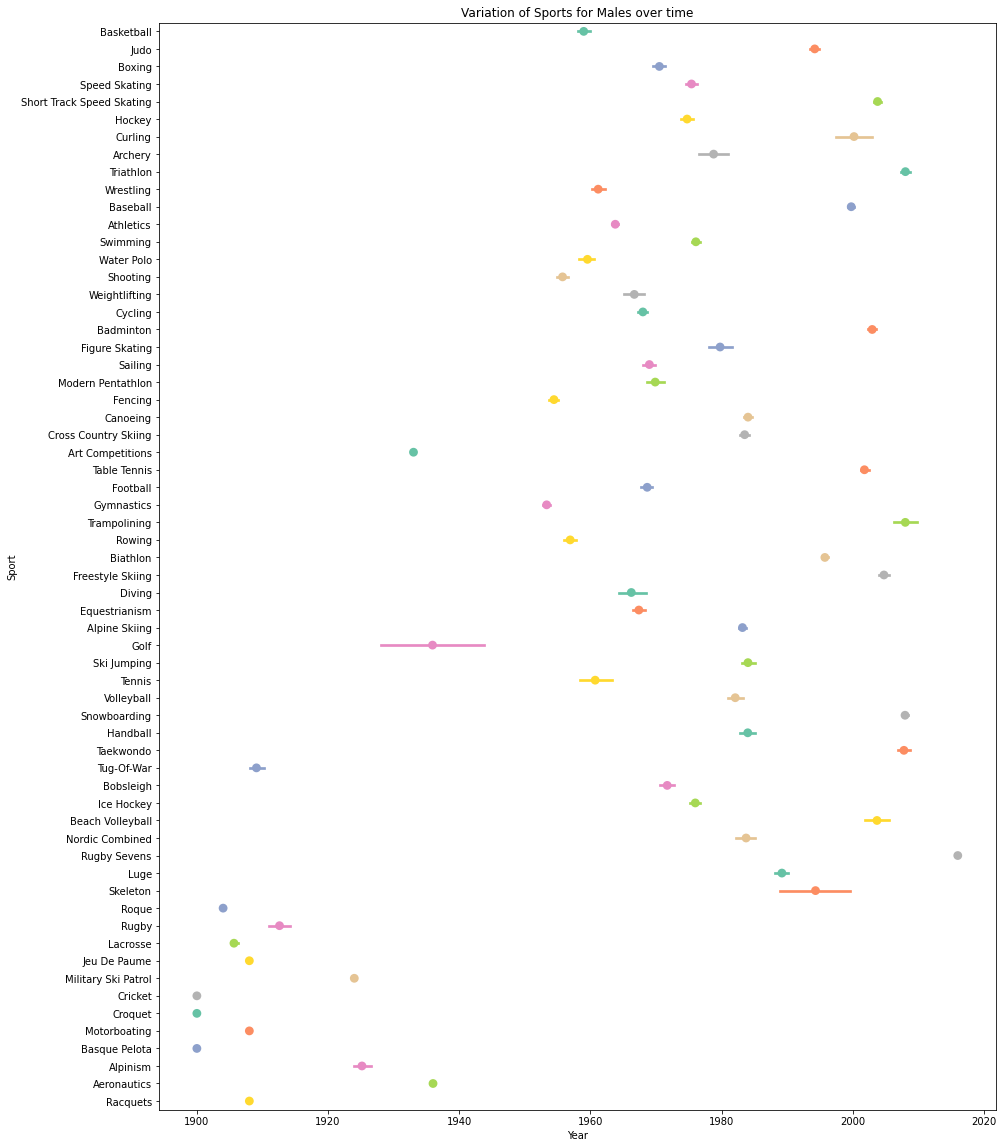

In [ ]:
plt.figure(figsize=(15, 20))
sns.pointplot('Year', 'Sport', data=Males, palette='Set2')
plt.title('Variation of Sports for Males over time')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Sports for Females over time')

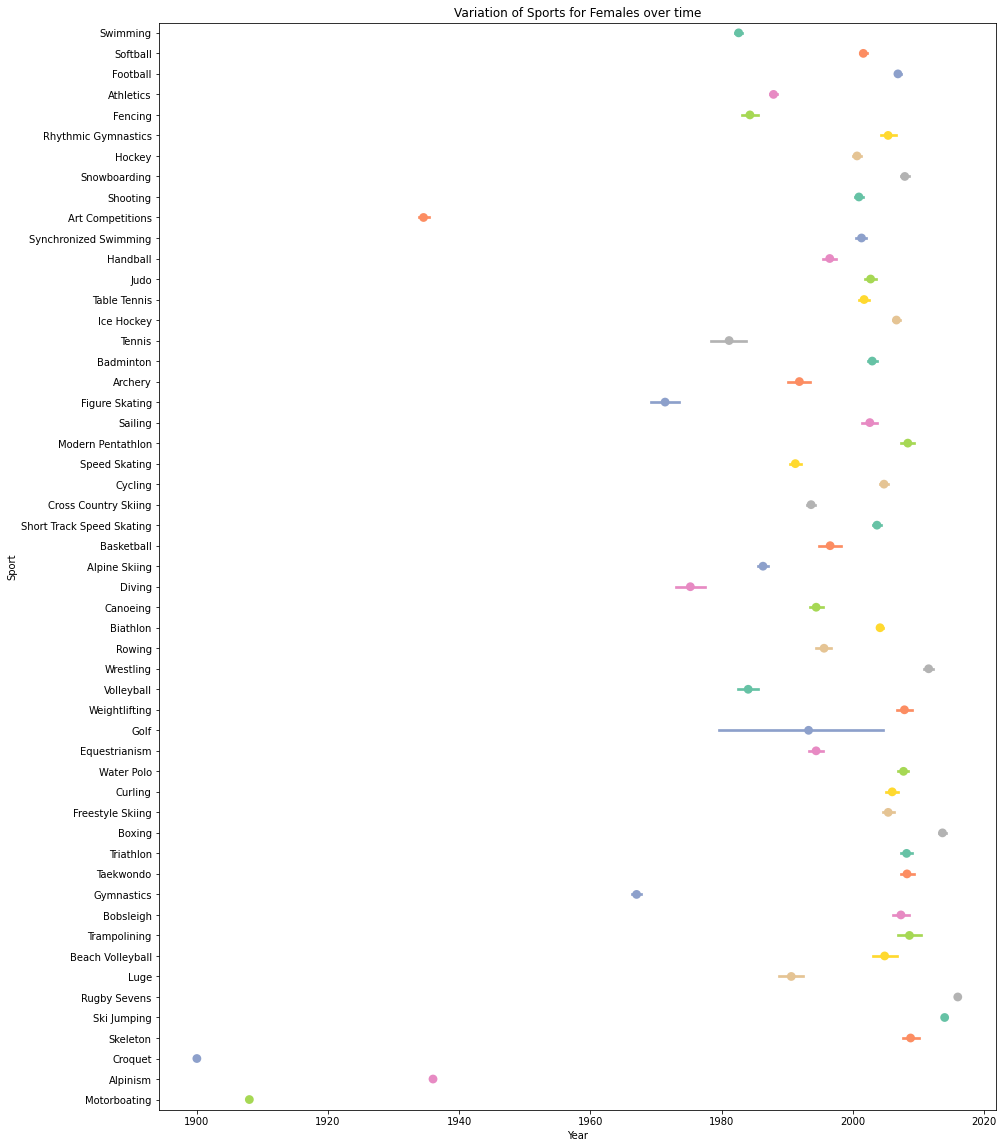

In [ ]:
plt.figure(figsize=(15, 20))
sns.pointplot('Year', 'Sport', data=Females, palette='Set2')
plt.title('Variation of Sports for Females over time')

Text(0.5, 1.0, 'Women medals per edition of the Games')

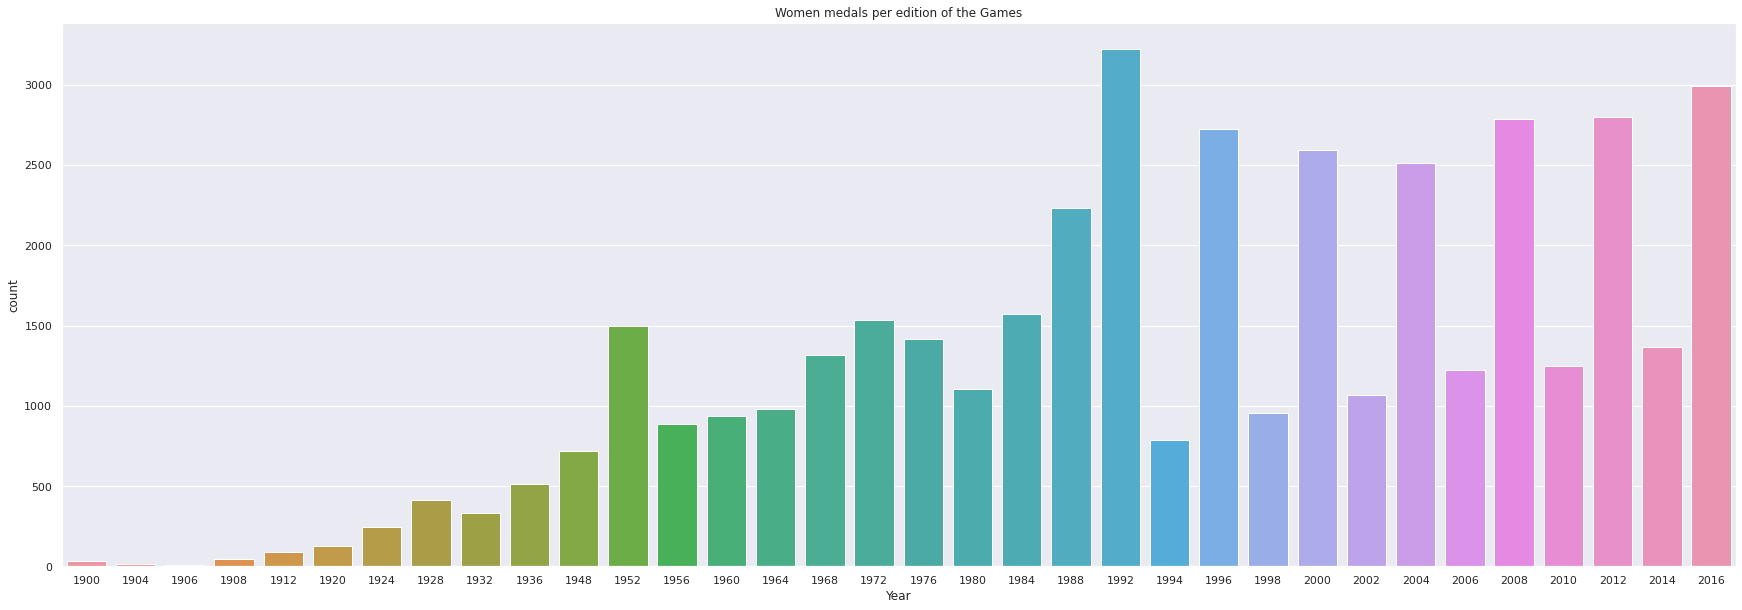

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=Females)
plt.title('Women medals per edition of the Games')

Text(0.5, 1.0, 'Mel medals per edition of the Games')

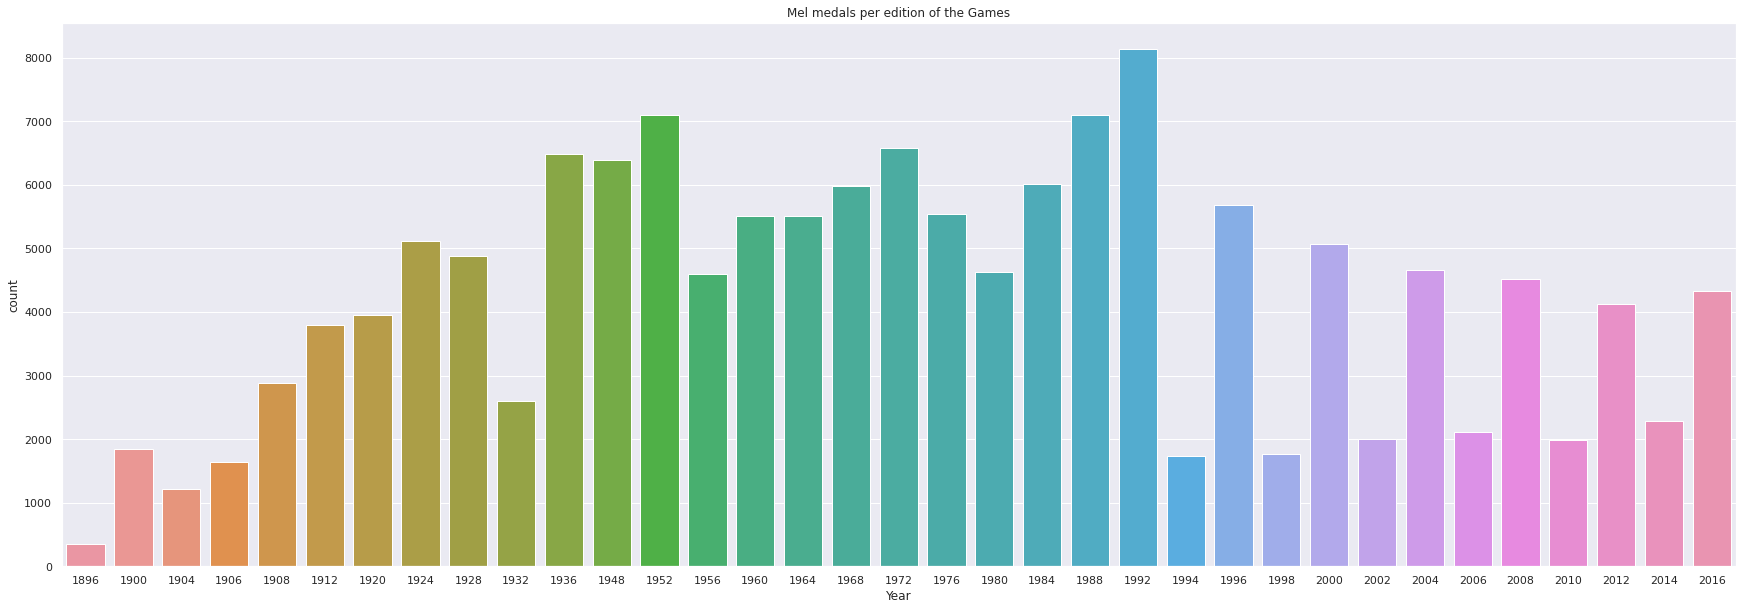

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=Males)
plt.title('Mel medals per edition of the Games')

# **Seasson characteristic Variation**


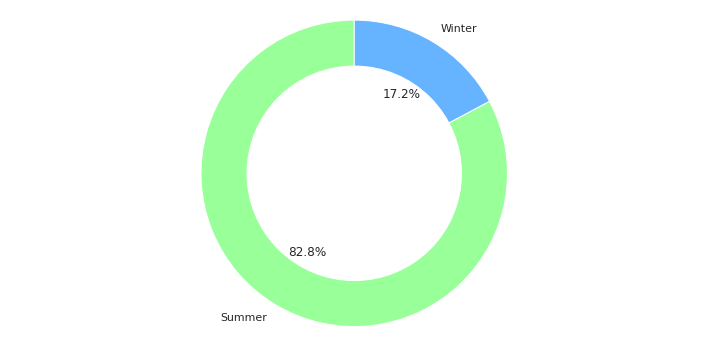

In [ ]:
Diff_seasons = tmp_medal.Season.value_counts()
Diff_seasons

fig1, ax1 = plt.subplots()

colors = ['#99ff99','#66b3ff']

ax1.pie(Diff_seasons, colors = colors, labels=Diff_seasons.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [ ]:
summer_data =Olympics_data_cleaned[Olympics_data_cleaned['Season']=='Summer']
summer_data = summer_data[summer_data.Medal.notnull()]
# summer_data

winter_data =Olympics_data_cleaned[Olympics_data_cleaned['Season']=='Winter']
winter_data = winter_data[winter_data.Medal.notnull()]

summer_data = summer_data.groupby(['Year'])
winter_data = winter_data.groupby(['Year'])



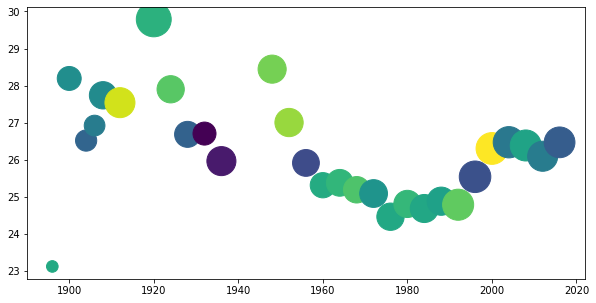

In [ ]:
#summer
plt.scatter(summer_data.mean().index,summer_data.Age.mean().values,s = summer_data.Medal.count().values, c= np.random.randn(len(summer_data)))

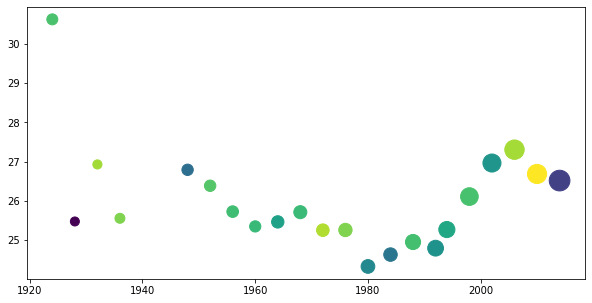

In [ ]:
#winter
plt.scatter(winter_data .mean().index,winter_data .Age.mean().values,s = winter_data .Medal.count().values, c= np.random.randn(len(winter_data )))